# **Задача**
Требуется определить внешний $R$ и внутренний $r$ радиусы цилиндрической трубы, если известны ее длина $\ell$, толщина $h=R-r$, плотность $\rho$ и момент инерции относительно ее продольной оси $I$.

Момент инерции для цилиндрической трубы вычисляется по формуле$$
I = \frac{\pi\rho \ell}{2} (R^4 - r^4)
$$и задача сводится к решению кубического уравнения.

Выведите это кубическое уравнение

Решите его численно (см. scipy.optimize.brentq или другой метод) для значений: $\ell = 2$, $h=0.02$, $\rho = 1200$, $I = 1.2$. Сколько вещественных корней имеет уравнение?

Построить график зависимости $r$ от $I$ при значениях $\ell$, $h$, $\rho$, указанных выше.

# **Решение**
Сначала я привел уравнение в нормальный, понятный нам вид, относительно одной неизвестной. Решил эту уравнение численно.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
r=[0, 0, 0]
c=0
l = 2
h = 0.02
p = 1200
I = 1.2
 pi = 3.14
Koef=(pi*p*l*h*0.5)
coeff = [ 4*Koef, 6*h*Koef, 4*(h**2)*Koef, ((h**3)*Koef-I)]
#coeff = [ (2*pi*p*l*h**3), (pi*p*l*h**2*(h+1)), 0, (I-(0.5*pi*p*l*h**4))]
#coeff = [1, 3, -5, -4]

res=np.roots(coeff)

for i in range(len(res)):
    if (float((res[i]).imag)==0):
        r[i]=(res[i]).real
        c+=1
#        print('Внутренний радиус r = ', (res[i]).real)
print('Колличество действительных корней: ',c)
c=0

for i in range(len(r)):
    if r[i]!=0:
        c+=1
        print(c,') ' 'Внутренний радиус r = ', r[i])
        print('    Внешний радиус R = ', r[i]+h)



Колличество действительных корней:  1
1 ) Внутренний радиус r =  0.14827660859483766
    Внешний радиус R =  0.16827660859483765


Добавил график зависимости момента инерции от радиуса внутреннего.

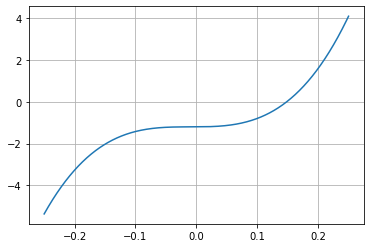

array([-0.0891383 +0.13743585j, -0.0891383 -0.13743585j,
        0.14827661+0.j        ])

In [2]:
ur=np.poly1d(coeff)
x=np.linspace(-0.25,0.25,1000)
#y=4*Koef*x**3+6*h*Koef*x**2+4*(h**2)*Koef*x+(h**3)*Koef-I
#y=(4*Koef(x**3) + 6*h*Koef(x**2) + 4*(h**2)*Koef*x + ((h**3)*Koef-I))
y=ur(x)
plt.grid()
plt.plot(x,y)
plt.show()
res